In [1]:
import os
os.putenv('DISPLAY', ':0.0')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pylab as ply
import seaborn as sns
import cProfile
import random
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
import CommonMotifProb

In [2]:
def createmotif(motif):
    finalmotif=[]
    for i in motif:
        if i[0]=='.':
            finalmotif.append(list(CommonMotifProb.AminoAcid1LTR))
        elif i[0]=='^':
            aas=i[1:]
            finalmotif.append(list(CommonMotifProb.AminoAcid1LTR-set(aas)))
        else:
            finalmotif.append(i)
    return finalmotif

In [3]:
def ismotifmatch(seq,motif):
    for i in range(len(seq)):
        if seq[i] not in motif[i]:
            return False
    return True
    

In [ ]:
randomnumberz=np.random.random(size=10000000)

In [4]:
def randomNucleotide(weights=[0.25,0.25,0.25,0.25],randnum=0.0):#A,T,C,G

    Aweight=weights[0]
    Tweight=weights[1]
    Cweight=weights[2]
    
    
    
    if randnum<Aweight:
        return 'A'
    elif randnum<Aweight+Tweight:
        return 'T'
    elif randnum<Aweight+Tweight+Cweight:
        return 'C'
    else:
        return 'G'
    

In [4]:
ALTNTevolveprobDICT={'A':[1-(1.3*10**-5+3.4*10**-5+3.0*10**-4), 1.3*10**-5, 3.4*10**-5, 3.0*10**-4],
                  'T':[4.5*10**-6, 1-(4.5*10**-6+3.1*10**-4+3.6*10**-5), 3.1*10**-4, 3.6*10**-5],
                  'C':[1.7*10**-5, 4.6*10**-5, 1-(1.7*10**-5+4.6*10**-5+9.7*10**-6), 9.7*10**-6],
                  'G':[7.2*10**-5, 6.0*10**-5, 2.8*10**-5, 1-(7.2*10**-5+6.0*10**-5+2.8*10**-5)]}

In [9]:
motif1=createmotif([['R'],['R'],['T'],['L'],['R']])
motif2=createmotif([['R'],['S'],['S'],['L'],['R']])

In [14]:
import random
import numpy as np
NTevolveprobDICT={'A':[1-(1.8*10**-5+1.5*10**-5+2.0*10**-4), 1.8*10**-5, 1.5*10**-5, 2.0*10**-4],
                  'T':[1.4*10**-5, 1-(2.3*10**-4+3.5*10**-5+1.4*10**-5), 2.3*10**-4, 3.5*10**-5],
                  'C':[7.7*10**-6, 2.7*10**-5, 1-(7.7*10**-6+2.7*10**-5+5.1*10**-6), 5.1*10**-6],
                  'G':[3.1*10**-5, 3.5*10**-5, 5.4*10**-5, 1-(3.1*10**-5+3.5*10**-5+5.4*10**-5)]}

#NTevolveprobDICT={'A':[1-(1.5*10**-5+3.5*10**-5+2.5*10**-4), 1.5*10**-5, 3.5*10**-5, 2.5*10**-4],
#                  'T':[1.4*10**-5, 1-(2.3*10**-4+3.5*10**-5+1.4*10**-5), 2.3*10**-4, 3.5*10**-5],
#                  'C':[7.7*10**-6, 2.7*10**-5, 1-(7.7*10**-6+2.7*10**-5+1.0*10**-5), 1.0*10**-5],
#                  'G':[3.1*10**-5, 3.5*10**-5, 5.4*10**-5, 1-(3.1*10**-5+3.5*10**-5+5.4*10**-5)]}

class QuasiSeq():
    def __init__(self,parentseq,randnums, seqlen):#, parentid):
        #self.parent=parentid
        self.seq= self._evolve(parentseq,seqlen,randnums)
        #if parentseq!=self.seq:
        self.protseq=CommonMotifProb.translateRNA(self.seq)
        #self.id= self._generate_ID()
        #self.children=[]
        #self.isDead=False
        self.fitness=self._fitness(self.seq)
        #else:
        #    self.fitness=1
        
        
    def _evolve(self,seq,seqlen,randnums):
        newseq=[None]*seqlen
        for i in range(seqlen):
            nt=seq[i]
            newseq[i]=randomNucleotide(NTevolveprobDICT[nt],randnums[i])

        newseq=''.join(newseq)
        return newseq
    
    def _fitness(self,seq):
        
        ismotif1=ismotifmatch(self.protseq,motif1)
        ismotif2=ismotifmatch(self.protseq,motif2)
        if ismotif1:
            return 1.1
        elif ismotif2:
            return 1.1
        else:
            return 1.0
            
        
    #def hasdied(self):
    #    #deathfunction(len(self.children))
    #    if len(self.children)>8:
    #        self.isDead=True
    #    else:
    #        self.isDead=False
    
    #def _generate_ID(self):
    #    seqs=['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N']
    #    ID=[0]*12
    #    for i in range(12):        
    #        randomIndex=random.randint(0,len(seqs)-1)
    #        ID[i]=seqs[randomIndex]
    #    return ID
    
    
    #def add_children(self,child):
    #    self.children.append(child)
        
        
            
            

In [11]:
def selection(seqpop,averagefit=0.00008657585527494178756940712878381,carrymod=1.0):
    nextfounders=[]
    for particle in seqpop:
        randnum=random.random()
        if randnum<averagefit*particle.fitness*carrymod:
            nextfounders.append(particle)
    return nextfounders

In [12]:
#add maximum carrying capacity for the population
def EvolveFix(founderseq,seqlen,popcarry):

    if type(founderseq)==str:
        segmentEnd=seqlen
        vRNApop=runSim(founderseq,segmentEnd)

        poptotal=[]
        poptotal+=vRNApop
        lenpoptotal=len(poptotal)
        while lenpoptotal<100:
            if type(poptotal)==list:
                newround=list(poptotal)
            else:
                newround=list([poptotal])
            poptotal=[]
            for founder in newround: 

                vRNApop=[founder]
                cRNApop=[]

                while len(cRNApop)<300:
                    cRNApop+=runSim(vRNApop,segmentEnd)
      
                    #print len(cRNApop)
                    vRNApop+=runSim(cRNApop,segmentEnd)

                #print 'End of cRNA production'
                #print 'vRNApop size=',len(vRNApop)
                while len(vRNApop)<11000:
                    vRNApop+=runSim(cRNApop,segmentEnd)


                founders=selection(vRNApop, averagefit=0.001)


                poptotal+=founders
                lenpoptotal=len(poptotal)
    else:
        poptotal=[]
        poptotal+=founderseq
        segmentEnd=seqlen
        lenpoptotal=len(poptotal)
        if len(poptotal)<popcarry/2.0:
            carrymodifier=1.3
        else:
            carrymodifier=1.0
        if type(poptotal)==list:
            newround=list(poptotal)
        else:
            newround=list([poptotal])
        poptotal=[]
        for founder in newround: 

            vRNApop=[founder]
            cRNApop=[]

            while len(cRNApop)<300:
                cRNApop+=runSim(vRNApop,segmentEnd)

                #print len(cRNApop)
                vRNApop+=runSim(cRNApop,segmentEnd)

            #print 'End of cRNA production'
            #print 'vRNApop size=',len(vRNApop)
            while len(vRNApop)<11000:
                vRNApop+=runSim(cRNApop,segmentEnd)


            founders=selection(vRNApop,carrymod=carrymodifier)


            poptotal+=founders
            
            if len(poptotal)>popcarry:
                survivors=[]
                deathprob=(len(poptotal)-float(popcarry))/float(len(poptotal))
                for k in poptotal:
                    if random.random()>(deathprob/k.fitness):
                        survivors.append(k)
                poptotal=list(survivors)
    return poptotal

In [16]:
#AGG AGG GGT ATC CTT GGT GCA (non robust codons apart from S/T position which still needs to evolve)
for l in range(10):
    poptotal='CGAAGTACTCTCCGA' #seq1='CGGCGGATCAAC'

    seqlen=len(poptotal)
    fixationdata=[]
    columns=['Gen','PopSize','HasMotifGood','HasMotifBad','FitGenoRatioGood','FitGenoRatioBad','Gentotypes']
    Fixation=False
    i=0
    while not Fixation and i<101: 

        poptotal=EvolveFix(poptotal,seqlen=seqlen, popcarry=1000)
        print i, 'Pop:', len(poptotal)

        motifcount=[]

        motifcountbad=[]


        genotypes=[]

        print len(poptotal)
        for m in poptotal:
            genotypes.append(m.seq)
            if m.fitness>1.1:
                motifcount.append(m)
            elif m.fitness>1.0:
                motifcountbad.append(m)
        print 'good:',len(motifcount), 'bad:',len(motifcountbad)      
        print 'good:',len(motifcount)/float(len(poptotal)),'bad:',len(motifcountbad)/float(len(poptotal))
        if len(motifcount)/float(len(poptotal))>0.95 or len(motifcountbad)/float(len(poptotal))>0.95:
            Fixation=True
        genotypesDF=pd.DataFrame(genotypes,columns=['Genotype'])
        unqgeno=[(j,genotypesDF['Genotype'].value_counts()[j]) for j in genotypesDF['Genotype'].value_counts().keys()]

        fixationdata.append([i,len(poptotal),len(motifcount),len(motifcountbad),len(motifcount)/float(len(poptotal)),len(motifcountbad)/float(len(poptotal)),unqgeno])
        i+=1
    FixDataDF=pd.DataFrame(fixationdata,columns=columns)
    
    FixDataDF.to_csv('Fixation-Sim-dualPeaksNew-CGAAGTACTCTCCGA-'+str(l)+'.csv')

0 Pop: 101
101
good: 0 bad: 0
good: 0.0 bad: 0.0
1 Pop: 117
117
good: 0 bad: 0
good: 0.0 bad: 0.0
2 Pop: 151
151
good: 0 bad: 0
good: 0.0 bad: 0.0
3 Pop: 215
215
good: 0 bad: 0
good: 0.0 bad: 0.0
4 Pop: 287
287
good: 0 bad: 0
good: 0.0 bad: 0.0
5 Pop: 360
360
good: 0 bad: 0
good: 0.0 bad: 0.0
6 Pop: 433
433
good: 0 bad: 0
good: 0.0 bad: 0.0
7 Pop: 515
515
good: 0 bad: 0
good: 0.0 bad: 0.0
8 Pop: 494
494
good: 0 bad: 0
good: 0.0 bad: 0.0
9 Pop: 552
552
good: 0 bad: 1
good: 0.0 bad: 0.0018115942029
10 Pop: 508
508
good: 0 bad: 2
good: 0.0 bad: 0.00393700787402
11 Pop: 530
530
good: 0 bad: 4
good: 0.0 bad: 0.00754716981132
12 Pop: 469
469
good: 0 bad: 4
good: 0.0 bad: 0.00852878464819
13 Pop: 555
555
good: 0 bad: 6
good: 0.0 bad: 0.0108108108108
14 Pop: 585
585
good: 0 bad: 17
good: 0.0 bad: 0.0290598290598
15 Pop: 549
549
good: 0 bad: 11
good: 0.0 bad: 0.0200364298725
16 Pop: 550
550
good: 0 bad: 8
good: 0.0 bad: 0.0145454545455
17 Pop: 534
534
good: 0 bad: 6
good: 0.0 bad: 0.01123595505

KeyboardInterrupt: 

In [327]:
FixDataDF

,Gen,PopSize,HasMotif,FitGenoRatio,Gentotypes
0,0,172,0,0.000000,"[(CGGCGGATCAAC, 165), (AGGCGGATCAAC, 6), (CGGC..."
1,1,160,0,0.000000,"[(CGGCGGATCAAC, 156), (AGGCGGATCAAC, 2), (CGCC..."
2,2,131,0,0.000000,"[(CGGCGGATCAAC, 125), (AGGCGGATCAAC, 3), (CCGC..."
3,3,126,0,0.000000,"[(CGGCGGATCAAC, 121), (AGGCGGATCAAC, 4), (CCGC..."
4,4,114,0,0.000000,"[(CGGCGGATCAAC, 110), (AGGCGGATCAAC, 2), (CCGC..."
5,5,103,0,0.000000,"[(CGGCGGATCAAC, 99), (CCGCGGATCAAC, 3), (AGGCG..."
6,6,105,0,0.000000,"[(CGGCGGATCAAC, 99), (CCGCGGATCAAC, 6)]"
7,7,92,0,0.000000,"[(CGGCGGATCAAC, 86), (CCGCGGATCAAC, 6)]"
8,8,126,0,0.000000,"[(CGGCGGATCAAC, 117), (CCGCGGATCAAC, 6), (CGGC..."
9,9,137,0,0.000000,"[(CGGCGGATCAAC, 127), (CCGCGGATCAAC, 4), (CGGG..."


In [328]:
FixDataDF.to_csv('Fixation-Sim-CGGCGGATCAAC-5.csv')

In [249]:
columns=['Gen','PopSize','HasMotif','FitGenoRatio','Gentotypes']

motifcount=[]
fixationdata=[]
genotypes=[]

print len(poptotal)
for i in poptotal:
    genotypes.append(i.seq)
    if i.fitness>1:
        motifcount.append(i)
genotypesDF=df.DataFrame(genotypes,columns=['Genotype'])
unqgeno=genotypesDF['Genotype'].value_counts().keys()
print len(motifcount)        
print len(motifcount)/float(len(poptotal))

fixationdata.append([i,len(poptotal),len(motifcount),len(motifcount)/float(len(poptotal)),unqgeno])

0
1
2
3
4
5
6
7


In [279]:
import cProfile
founder='AGGAGGATCAAC'
cProfile.run('EvolveFix(founder,seqlen)')

         3806720 function calls in 7.027 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   126964    0.332    0.000    0.523    0.000 <ipython-input-14-21fd8ce5e5ee>:1(ismotifmatch)
       11    0.114    0.010    0.201    0.018 <ipython-input-218-bf3869449f75>:1(selection)
  1523568    1.357    0.000    1.357    0.000 <ipython-input-220-46e3deef16f1>:1(randomNucleotide)
   126964    0.459    0.000    6.396    0.000 <ipython-input-263-08069c32f2d8>:14(__init__)
   126964    2.011    0.000    3.587    0.000 <ipython-input-263-08069c32f2d8>:27(_evolve)
   126964    0.207    0.000    0.730    0.000 <ipython-input-263-08069c32f2d8>:38(_fitness)
      463    0.300    0.001    6.809    0.015 <ipython-input-275-0aa20d64654d>:2(runSim)
        1    0.016    0.016    7.026    7.026 <ipython-input-276-e1c368dbb128>:2(EvolveFix)
        1    0.001    0.001    7.027    7.027 <string>:1(<module>)
   126964    0.958    0.000    1.620    

In [174]:
for particle in poptotal:
    if particle.fitness>1:
        print particle.protseq
        print particle.seq

RRGTSGA
AGGAGGGGTACCAGCGGTGCA
RRGTSGA
AGGAGGGGTACCAGCGGTGCA
RRGTSGA
AGGAGGGGTACCAGCGGTGCA
RRGTSGA
AGGAGGGGTACCAGCGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AGGAGGGGTACCAACGGTGCA
RRGTNGA
AG

In [172]:
motifcount=[]
print len(poptotal)
for i in poptotal:
    if i.fitness>1:
        motifcount.append(i)
print len(motifcount)        
print len(motifcount)/float(len(poptotal))

118
1
0.00847457627119


In [63]:
a=[1,2]
b=list(a)
a[1]=10
print b
print a

[1, 2]
[1, 10]


In [43]:
for i in founderstotal:
    for j in i:

        print j.fitness

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [32]:
nts=['A','T','C','G']

In [13]:
#if called for a string to found new population use randpool=a list of random numbers of len=seqlen
def runSim(founderseq,seqlen):
    
    if type(founderseq)==str:
        randpool=np.random.random(size=seqlen)
        Founder=QuasiSeq(founderseq,randpool,seqlen)#,None)
        VirusPool=[Founder]
    else:
        VirusPool=founderseq
    randpool=np.random.random(size=len(founderseq)*seqlen)
    newGeneration=[]
    randIndex=0
    for virus in VirusPool:
        randnums=randpool[randIndex:randIndex+seqlen]
        #if not virus.isDead:
        viralChild=QuasiSeq(virus.seq, randnums,seqlen)#,virus.id)
        newGeneration.append(viralChild)
        randIndex+=seqlen
            #virus.add_children(viralChild.id)
            #if len(VirusPool)>3000000:
            #    randnum=random.random()
            #    if randnum<1.0/len(VirusPool):
            #        virus.isDead=True
    VirusPool=newGeneration
        
    return VirusPool
#for virus in VirusPool:
    #print len(VirusPool), VirusPool[0].__dict__,'\n',VirusPool[1].__dict__,'\n',VirusPool[2].__dict__,'\n',VirusPool[3].__dict__,'\n',VirusPool[4].__dict__

In [10]:

def analysepool(VirusPool ):
    ViralQuassiSpecies={}
    addedUnique=[]
    for virus in VirusPool:
        if virus.seq not in addedUnique and not virus.isDead:
            addedUnique.append(virus.seq)
            ViralQuassiSpecies[virus.seq]=1
        elif not virus.isDead:
            ViralQuassiSpecies[virus.seq]+=1
    return ViralQuassiSpecies
#for i in ViralQuassiSpecies:
#    print i,'----',translateRNA(i), '----', ViralQuassiSpecies[i]

In [11]:
#Include per generation breakdown of genotype distribution

In [12]:
def simpop(founderseq,gen):
    tenreplicateslow={}
    founderseq=founderseq
    for i in range(gen):
        pool=runSim(founderseq, 14)
        poolsumm=analysepool(pool)
        tenreplicateslow[i]=poolsumm
    return tenreplicateslow
    

In [ ]:
vRNApop=runSim('AAACCCGGGTTT')
print vRNApop[0].seq

In [77]:
#codons=['ACTGCAACACTGTGCTTGGGGCATCATGCAGTACCGAACGGGACAATAGTGAAGACAATTACGGATGACCAAATTGAGGTGACCAATGCCACTGAGCTGGTCCGGAGCTCCTCGACAGGGAAAATATGCAACAATCCACATAGAATCCTTGATGGAAGAGACTGTACACTGATAGATGCCCTACTGGGAGACCCCCACTGTGATGTGTTCCAAGACGAAACCTGGGACCTTTATGTGGAACGTAGCAATGCCTTCAGTAACTGCTATCCCTATGACGTACCAGACTATGCATCACTCAGGTCTCTAGTTGCTTCCTCAGGAACCCTAGAGTTCATCACAGAAGGATTCACATGGACAGGAGTCACTCAGAATGGAGGAAGTAATGCCTGCAAAAGAGGGCCTGCTAGTGGTTTCTTCAGCAGACTAAATTGGCTGACTAAATCTGGAAGTGCTTACCCAGTGTTGAATGTAACTATGCCAAATAATGACAACTTTGACAAATTGTATGTCTGGGGAGTTCACCACCCAAGCACAAACCAAGAGCAAACCAACCTATACGTTCAAGCATCAGGAAGAGTAACAGTTTCAACTAGAAGGAGCCAACAAACCATAATCCCGAATATTGGATCCAGGCCTTTGGTAAGGGGCCAATCAGGGAGGATAAGCATCTACTGGACAATAGTGAAGCCGGGGGATGTACTAGTAATTAACAGTAATGGTAACCTAATCGCTCCTCGAGGATATTTCAAAATGCGCACTGGGAAAAGCTCAATAATGAGATCAGATGCACCTATTGACACATGCATTTCTGAGTGTATCACTCCTAATGGAAGCATCCCCAATGACAAGCCCTTTCAGAATGTAAACAAGATCACTTACGGAGCATGTCCTAAGTATGTCAAACAGAGCACTCTAAAACTGGCAACAGGGATGAGAAACGTGCCTGAGAAACAAACCAGGGGTCTGTTCGGTGCAATAGCAGGATTTATAGAAAATGGATGGGAAGGAATGATAGACGGCTGGTATGGTTTCAGACACCAGAACTCTGAGGGTACAGGGCAAGCTGCAGACCTAAAAAGCACACAGGCAGCCATCGACCAGATTAATGGGAAATTGAACCGAGTAATCGAGAAAACAAATGAGAAGTTTCACCAGATTGAAAAGGAATTCTCTGAAGTAGAAGGAAGAATCCAGGACCTTGAGAAATATGTTGAAGACACTAAAATAGATCTATGGTCTTACAATGCAGAGCTTCTGGTGGCCTTGGAAAACCAGCATACAATTGACTTGACTGATTCTGAAATGAACAAACTATTTGAGAAGACGAGGCGGCAACTGAGGGAGAATGCTGAAGATATGGGCAACGGTTGCTTCAAAATATACCACAAATGTGACAACGCATGTATAGAGTCAATCAGGAACGGGACCTATGATCATGACATATACAGAGATGAAGCATTAAACAACCGATTTCAAATCAAGGGTGTAGAGCTAAAATCTGGGTACAAAGATTGGATCTTATGGATTTCCTTTGCCATATCATGCTTTTTGCTTTGTGTTGTTCTACTGGGGTTCATTATGTGGGCCTGCCAAAGAGGCAACATTAGGTGCAACATTTGCATTTGA']
#AGGAGGGGTATCAACGGTGCA #high gain

#AGGAGGGGTCGCAACGGTGCA #low gain
#sequence to simulate loss

#high retention prob, low loss expected
#checkneutral=['CGACGAGGTACCAACGGTGCA']

#low retention prob, high loss expected
#codons=['AGGAGGGGTATCAACGGTGCA','AGGAGGGGTCGCAACGGTGCA']
#codons=['TAATAATAATAATAATAATAATAA','TAGTAGTAGTAGTAGTAGTAGTAG']
for l in range(11,30):
    print l
    poplist={}
    codons=['ATC','ATA','TTC','AGA','AAC','GCC','CCC','CGC']
    for i in codons:
        poplist[i]=[]
    for codon in codons:
        for k in range(500):
            if not k%100:

                print codon,k
            vRNApop=runSim(codon)#AGT
            #print vRNApop[0].seq
            cRNApop=[]
            while len(cRNApop)<300:
                cRNApop+=runSim(vRNApop)
                #print len(cRNApop)
                vRNApop+=runSim(cRNApop)
            #print 'End of cRNA production'
            #print 'vRNApop size=',len(vRNApop)
            while len(vRNApop)<11000:
                vRNApop+=runSim(cRNApop)
                #print len(vRNApop)
            poplist[codon].append(vRNApop)
            
    summary={}

    for codon in codons:
        summary[codon]={}
        popcount=1
        for vRNApop in poplist[codon]:
            summary[codon][popcount]={}
            for i in vRNApop:
                a=i.seq
                try:
                    summary[codon][popcount][a]+=1
                except:
                    summary[codon][popcount][a]=1
            popcount+=1
    columns=['StartCodon','PopReplicate','TargetCodon','Count']
    datalist=[]
    for i in summary:
        for j in summary[i]:
            for k in summary[i][j]:
                count=summary[i][j][k]
                datalist.append([i,j,k,count])

    totalsimresultsreplicatesDF=pd.DataFrame(datalist,columns=columns)
    totalsimresultsreplicatesDF.to_csv('CodontoSTgainfor8codons-forThesis_'+str(l)+'.csv')

11
ATC 0
ATC 100
ATC 200
ATC 300
ATC 400
ATA 0
ATA 100
ATA 200
ATA 300
ATA 400
TTC 0
TTC 100
TTC 200
TTC 300
TTC 400
AGA 0
AGA 100
AGA 200
AGA 300
AGA 400
AAC 0
AAC 100
AAC 200
AAC 300
AAC 400
GCC 0
GCC 100
GCC 200
GCC 300
GCC 400
CCC 0
CCC 100
CCC 200
CCC 300
CCC 400
CGC 0
CGC 100
CGC 200
CGC 300
CGC 400
12
ATC 0
ATC 100
ATC 200
ATC 300
ATC 400
ATA 0
ATA 100
ATA 200
ATA 300
ATA 400
TTC 0
TTC 100
TTC 200
TTC 300
TTC 400
AGA 0
AGA 100
AGA 200
AGA 300
AGA 400
AAC 0
AAC 100
AAC 200
AAC 300
AAC 400
GCC 0
GCC 100
GCC 200
GCC 300
GCC 400
CCC 0
CCC 100
CCC 200
CCC 300
CCC 400
CGC 0
CGC 100
CGC 200
CGC 300
CGC 400
13
ATC 0
ATC 100
ATC 200
ATC 300
ATC 400
ATA 0
ATA 100
ATA 200
ATA 300
ATA 400
TTC 0
TTC 100
TTC 200
TTC 300
TTC 400
AGA 0
AGA 100
AGA 200
AGA 300
AGA 400
AAC 0
AAC 100
AAC 200
AAC 300
AAC 400
GCC 0
GCC 100
GCC 200
GCC 300
GCC 400
CCC 0
CCC 100
CCC 200
CCC 300
CCC 400
CGC 0
CGC 100
CGC 200
CGC 300
CGC 400
14
ATC 0
ATC 100
ATC 200
ATC 300
ATC 400
ATA 0
ATA 100
ATA 200
ATA 300
ATA 400


In [39]:
totalsimresultsreplicatesDF.to_csv('CodontoSTgainfor8codons-forThesis_1000_'+str(l)+'.csv')

In [ ]:
#AGGAGGGGTATCAACGGTGCA #high gain

#AGGAGGGGTCGCAACGGTGCA #low gain

In [24]:
#DFlist=[pd.read_csv('STsim1000reps.csv',index_col=0),pd.read_csv('STsim500reps_1.csv',index_col=0),pd.read_csv('STsim500reps_2.csv',index_col=0),pd.read_csv('STsim500reps_3.csv',index_col=0),pd.read_csv('STsim500reps_4.csv',index_col=0)]
#DFlist=[pd.read_csv('PKAmotifgainsimAltRate1000reps_1.csv',index_col=0)]#,pd.read_csv('PKAmotifsimAltRate500reps_2.csv',index_col=0)]
#fullDF=pd.concat(DFlist)
fullDF=totalsimresultsreplicatesDF
alltargetCodons=fullDF.TargetCodon.unique()


columns=['StartSeq','PopRep','MotifCount','NonMotifCount']


motif1=createmotif([['*'],['*'],['*'],['*'],['*'],['*'],['*'],['*']])
datalist=[]
for i in range(1,101):#range is number of replicates
    for codon in codons:
        summary={}
        tempDF=fullDF[(fullDF['StartCodon']==codon) & (fullDF['PopReplicate']==i)]
        motifcount=0
        nonmotifcount=0
        for TCodon in tempDF['TargetCodon']:

            protseq=CommonMotifProb.translateRNA(TCodon)
            ismotif=ismotifmatch(protseq,motif1)

            if ismotif:
                motifcount+=int(tempDF[tempDF['TargetCodon']==TCodon]['Count'])

            else:
                nonmotifcount+=int(tempDF[tempDF['TargetCodon']==TCodon]['Count'])
        datalist.append([codon,i,motifcount,nonmotifcount])

            
motifmutDF=pd.DataFrame(datalist,columns=columns)


In [25]:
motifmutDF

,StartSeq,PopRep,MotifCount,NonMotifCount
0,TAATAATAATAATAATAATAATAA,1,10453,713
1,TAGTAGTAGTAGTAGTAGTAGTAG,1,10416,750
2,TAATAATAATAATAATAATAATAA,2,10429,737
3,TAGTAGTAGTAGTAGTAGTAGTAG,2,11082,84
4,TAATAATAATAATAATAATAATAA,3,11140,26
5,TAGTAGTAGTAGTAGTAGTAGTAG,3,10881,285
6,TAATAATAATAATAATAATAATAA,4,11055,111
7,TAGTAGTAGTAGTAGTAGTAGTAG,4,11085,81
8,TAATAATAATAATAATAATAATAA,5,11105,61
9,TAGTAGTAGTAGTAGTAGTAGTAG,5,10998,168


In [27]:
#Some dataanalysis results for motif loss stop codons'
print np.mean(motifmutDF[motifmutDF['StartSeq']=='TAATAATAATAATAATAATAATAA']['MotifCount'])
print np.mean(motifmutDF[motifmutDF['StartSeq']=='TAGTAGTAGTAGTAGTAGTAGTAG']['MotifCount'])

print np.mean(motifmutDF[motifmutDF['StartSeq']=='TAATAATAATAATAATAATAATAA']['NonMotifCount'])
print np.mean(motifmutDF[motifmutDF['StartSeq']=='TAGTAGTAGTAGTAGTAGTAGTAG']['NonMotifCount'])

print len(motifmutDF[(motifmutDF['StartSeq']=='TAATAATAATAATAATAATAATAA') & (motifmutDF['NonMotifCount']>1000)])
print len(motifmutDF[(motifmutDF['StartSeq']=='TAGTAGTAGTAGTAGTAGTAGTAG') & (motifmutDF['NonMotifCount']>1000)])

#print np.mean(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA') & (motifmutDF['MotifCount']>0)]['MotifCount'])
#print np.mean(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA') & (motifmutDF['MotifCount']>0)]['MotifCount'])

#print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA') & (motifmutDF['MotifCount']>1100)])
#print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA') & (motifmutDF['MotifCount']>1100)])

10989.16
10848.89
176.84
317.11
3
7


In [ ]:
summary={}

for codon in codons:
    summary[codon]={}
    popcount=1
    for vRNApop in poplist[codon]:
        summary[codon][popcount]={}
        for i in vRNApop:
            a=i.seq
            try:
                summary[codon][popcount][a]+=1
            except:
                summary[codon][popcount][a]=1
        popcount+=1
columns=['StartCodon','PopReplicate','TargetCodon','Count']
datalist=[]
for i in summary:
    for j in summary[i]:
        for k in summary[i][j]:
            count=summary[i][j][k]
            datalist.append([i,j,k,count])

totalsimresultsreplicatesDF=pd.DataFrame(datalist,columns=columns)
    

In [ ]:
#totalsimresultsreplicatesDF=pd.DataFrame(datalist,columns=columns)
totalsimresultsreplicatesDF.to_csv('STsim500reps_4.csv')

In [ ]:
DF=pd.read_csv('STsim500reps_4.csv',index_col=0)
a= DF[DF['StartCodon']=='TCT']
b=a[a['TargetCodon']=='TQQ']
print len(b)
c=np.sum(b['Count'])
print c
summary={}
for entry in a.iterrows():
    entrydata=entry[1]
    try:
        summary[entrydata.TargetCodon]+=entrydata.Count
    except:
        summary[entrydata.TargetCodon]=entrydata.Count
print summary['TCC']
for i in a.TargetCodon.value_counts().index:
    print i
    
print a.TargetCodon.unique()

In [ ]:
counts= fullDF[(fullDF['StartCodon']=='TCT') & (fullDF['TargetCodon']=='CCT')]['Count']

print sorted(counts)

#print sum(counts),
counts= fullDF[(fullDF['StartCodon']=='AGC') & (fullDF['TargetCodon']=='GGC')]['Count']
print sorted(counts)

#counts= fullDF[(fullDF['StartCodon']=='ACC') & (fullDF['TargetCodon']=='GCC')]['Count']
#print sum(counts),
#counts= fullDF[(fullDF['StartCodon']=='ACC') & (fullDF['TargetCodon']=='ACC')]['Count']
#print sum (counts)

In [53]:
print int(fullDF[(fullDF['TargetCodon']=='CGACGAGGTACCAACGGTGCA') & (fullDF['PopReplicate']==12)]['Count'])

11142


In [85]:
#DFlist=[pd.read_csv('STsim1000reps.csv',index_col=0),pd.read_csv('STsim500reps_1.csv',index_col=0),pd.read_csv('STsim500reps_2.csv',index_col=0),pd.read_csv('STsim500reps_3.csv',index_col=0),pd.read_csv('STsim500reps_4.csv',index_col=0)]
DFlist=[pd.read_csv('PKAmotifgainsimAltRate1000reps_1.csv',index_col=0)]#,pd.read_csv('PKAmotifsimAltRate500reps_2.csv',index_col=0)]
fullDF=pd.concat(DFlist)

alltargetCodons=fullDF.TargetCodon.unique()


columns=['StartSeq','PopRep','MotifCount','NonMotifCount']


motif1=createmotif([['R','K'],['R','K'],['.'],['S','T'],['^','P'],['.'],['.'],['.']])
datalist=[]
for i in range(1,501):
    for codon in codons:
        summary={}
        tempDF=fullDF[(fullDF['StartCodon']==codon) & (fullDF['PopReplicate']==i)]
        motifcount=0
        nonmotifcount=0
        for TCodon in tempDF['TargetCodon']:

            protseq=CommonMotifProb.translateRNA(TCodon)
            ismotif=ismotifmatch(protseq,motif1)

            if ismotif:
                motifcount+=int(tempDF[tempDF['TargetCodon']==TCodon]['Count'])

            else:
                nonmotifcount+=int(tempDF[tempDF['TargetCodon']==TCodon]['Count'])
        datalist.append([codon,i,motifcount,nonmotifcount])

            
motifmutDF=pd.DataFrame(datalist,columns=columns)


['^', 'P']
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRRTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTSGA
RRGTNGA
RRGTNGA
RRATNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNCA
RRGTNGA
RRGTNGS
RRGTSGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNAA
RRGTNGA
RRGSNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTDGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGSNGA
RRGTNGA
RRGTNGA
RRGTNGA
RRGSN

In [91]:
fullDF

,StartCodon,PopReplicate,TargetCodon,Count
0,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACGCTGCA,1
1,AGGAGGGGTCGCAACGGTGCA,1,AGGGGGGGTCGCAACGGTGCA,2
2,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACGGCGCA,7
3,AGGAGGGGTCGCAACGGTGCA,1,AGGCGGGGTCGCAACGGTGCA,1
4,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACCGTGCA,1
5,AGGAGGGGTCGCAACGGTGCA,1,AGGTGGGGTCGCAACGGTGCA,1
6,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACGGTCCA,1
7,AGGAGGGGTCGCAACGGTGCA,1,TGGAGGGGTCGCAACGGTGCA,1
8,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACGTTGCA,1
9,AGGAGGGGTCGCAACGGTGCA,1,AGGAGGGGTCGCAACAGTGCA,2


In [81]:
motifmutDF
#motifmutDF.to_csv('MotifGainQuasiSimData1000reps_1.csv')

,StartSeq,PopRep,MotifCount,NonMotifCount
0,AGGAGGGGTATCAACGGTGCA,1,0,11166
1,AGGAGGGGTCGCAACGGTGCA,1,0,11166
2,AGGAGGGGTATCAACGGTGCA,2,0,11166
3,AGGAGGGGTCGCAACGGTGCA,2,0,11166
4,AGGAGGGGTATCAACGGTGCA,3,1,11165
5,AGGAGGGGTCGCAACGGTGCA,3,0,11166
6,AGGAGGGGTATCAACGGTGCA,4,3,11163
7,AGGAGGGGTCGCAACGGTGCA,4,0,11166
8,AGGAGGGGTATCAACGGTGCA,5,1,11165
9,AGGAGGGGTCGCAACGGTGCA,5,0,11166


In [92]:
#Some dataanalysis results for motif gain from 'MotifLossQuasiSimData500reps_1.csv'
print np.mean(motifmutDF[motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA']['MotifCount'])
print np.mean(motifmutDF[motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA']['MotifCount'])

print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA') & (motifmutDF['MotifCount']>0)])
print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA') & (motifmutDF['MotifCount']>0)])

print np.mean(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA') & (motifmutDF['MotifCount']>0)]['MotifCount'])
print np.mean(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA') & (motifmutDF['MotifCount']>0)]['MotifCount'])

print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTATCAACGGTGCA') & (motifmutDF['MotifCount']>1100)])
print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTCGCAACGGTGCA') & (motifmutDF['MotifCount']>1100)])

38.332
0.984
470
50
40.7787234043
9.84
3
0


In [71]:
#Some dataanalysis results for motif loss from 'MotifLossQuasiSimData500reps_1.csv'
print np.mean(motifmutDF[motifmutDF['StartSeq']=='CGACGAGGTACCAACGGTGCA']['NonMotifCount'])
print np.mean(motifmutDF[motifmutDF['StartSeq']=='AGGAGGGGTAGTCTTGGTGCA']['NonMotifCount'])

print len(motifmutDF[(motifmutDF['StartSeq']=='CGACGAGGTACCAACGGTGCA') & (motifmutDF['NonMotifCount']>550)])
print len(motifmutDF[(motifmutDF['StartSeq']=='AGGAGGGGTAGTCTTGGTGCA') & (motifmutDF['NonMotifCount']>550)])

83.344
130.678
7
18


In [19]:
DFlist=[pd.read_csv('STsim1000reps.csv',index_col=0),pd.read_csv('STsim500reps_1.csv',index_col=0),pd.read_csv('STsim500reps_2.csv',index_col=0),pd.read_csv('STsim500reps_3.csv',index_col=0),pd.read_csv('STsim500reps_4.csv',index_col=0)]
#DFlist=[pd.read_csv('STsimAltRate500reps_1.csv',index_col=0),pd.read_csv('STsimAltRate500reps_2.csv',index_col=0),pd.read_csv('STsimAltRate500reps_3.csv',index_col=0),pd.read_csv('STsimAltRate500reps_4.csv',index_col=0),pd.read_csv('STsimAltRate500reps_5.csv',index_col=0),pd.read_csv('STsimAltRate500reps_6.csv',index_col=0)]
fullDF=pd.concat(DFlist)
#fullDF=totalsimresultsreplicatesDF
#print fullDF
alltargetCodons=fullDF.TargetCodon.unique()
print alltargetCodons
totalmutsum=pd.DataFrame(index=CommonMotifProb.DNACodontoAADICT.keys(),columns=codons)
allcodonsum=pd.DataFrame(index=CommonMotifProb.DNACodontoAADICT.keys(),columns=['Count'])
totalmutsum=totalmutsum.fillna(0)
allcodonsum=allcodonsum.fillna(0)
labels=['Non-S/T','Total S/T']

for codon in codons:
    summary={}
    tempDF=fullDF[fullDF['StartCodon']==codon]
    for TCodon in alltargetCodons:
        eachtargetDF=tempDF[tempDF['TargetCodon']==TCodon]
        if TCodon not in labels:
            labels.append(TCodon)
        if TCodon!=codon:
            nooutlierDF=eachtargetDF[eachtargetDF['Count']<10000]
            totalmutsum[codon][TCodon]=np.sum(nooutlierDF['Count'])
        else: 
            allcodonsum['Count'][TCodon]=np.sum(eachtargetDF['Count'])


['ACC' 'GCC' 'ACT' 'ATC' 'AAC' 'CCC' 'AGC' 'ACA' 'ACG' 'TCC' 'ATA' 'ATG'
 'GCG' 'GTC' 'GCA' 'AGA' 'CCA' 'AAA' 'TCA' 'AGG' 'GCT' 'CCG' 'AAG' 'TCG'
 'GTG' 'CCT' 'TCT' 'TTT' 'TAT' 'TGT' 'GTT' 'TTC' 'CAT' 'TGC' 'GGC' 'AGT'
 'CGC' 'GGT' 'ATT' 'AAT' 'TAG' 'TTG' 'TGG' 'CTG' 'CAG' 'TAC' 'GAG' 'CGT'
 'GGG' 'GAT' 'CTC' 'TTA' 'TAA' 'TGA' 'CAA' 'GGA' 'CAC' 'GTA' 'CTT' 'CTA'
 'CGA' 'GAC']


In [ ]:
labels

In [20]:
labels=['Non-S/T','Total S/T']
codons=['ACC','ACT','ACG','ACA','TCT','TCC','TCG','TCA','AGT','AGC']

['ACT', 'ACC', 'ACG', 'TCC', 'AGC', 'TCT', 'ACA', 'TCA', 'TCG', 'AGT']


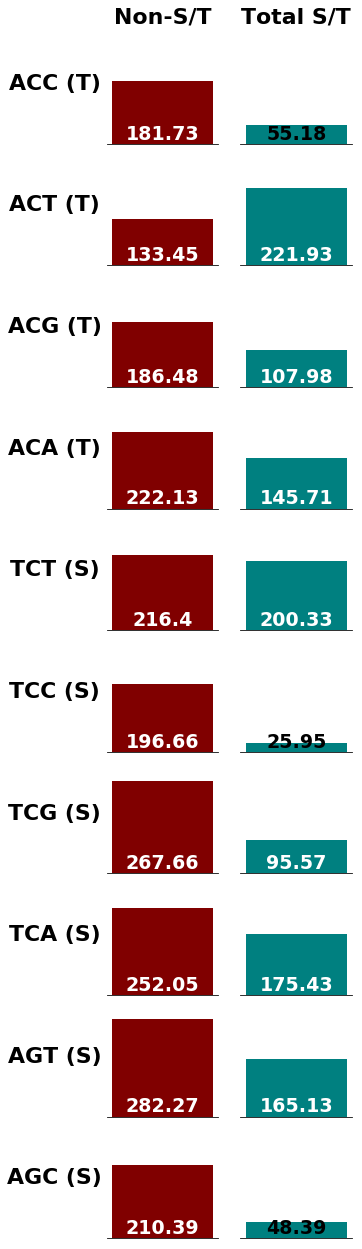

In [21]:
from operator import itemgetter
font=22
weight='semibold'


j=0
fig,ax_handles= plt.subplots(len(codons), len(labels),gridspec_kw = {'wspace':0.2,'hspace':0.2},figsize=(2.2*len(labels),2.2*len(codons)), sharex=True)

codonsums=[]
mutsums=[]
STsums=[]
codonsort=[]
for sourcecodon in codons:
    if sourcecodon:
        data=totalmutsum[sourcecodon]
        codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
        for i,aa in enumerate(labels):
            currentaminoacidtotal=0
            datasum=0

            if aa==labels[0]:
                datasum=0
                for codon in data.index:
                    if CommonMotifProb.translateRNA(codon) not in ['S','T']:
                        datasum+=data[codon]
                totalmut100k=(datasum*100000.0)/float(codonsum)
                codonsums.append(totalmut100k)
                codonsort.append((sourcecodon,totalmut100k))
            elif aa==labels[1]:
                datasum=0
                for codon in data.index:
                    if CommonMotifProb.translateRNA(codon) in ['S','T']:
                        datasum+=data[codon]
                totalmut100k=(datasum*100000.0)/float(codonsum)
                STsums.append(totalmut100k)
               
            
maxcodonsum=max(codonsums)
#maxmutsum=max(mutsums)
maxSTsum=maxcodonsum
#print maxcodonsum,maxmutsum
codonssorted= [i[0] for i in sorted(codonsort, key=itemgetter(1),reverse=False) if i[1]>0]
print codonssorted
for sourcecodon in codons:
    data=totalmutsum[sourcecodon]
    codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
    

    for i,aa in enumerate(labels):
        currentaminoacidtotal=0

        #print currentaminoacidtotal

    
        ax=ax_handles[j][i]
        
        
        
        if aa==labels[0]:
            datasum=0
            for codon in data.index:
                if CommonMotifProb.translateRNA(codon) not in ['S','T']:
                    datasum+=data[codon]
            totalmut100k=(datasum*100000.0)/float(codonsum)
            ax.bar([1],totalmut100k,align='center',color='maroon')
            ax.set_ylim(0,maxcodonsum+10)
            if totalmut100k>(0.2*maxcodonsum):
                color='white'
            else:
                color='black'
            if totalmut100k>0:
                ax.text(0.5, 0.01, round(totalmut100k,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)
        elif aa==labels[1]:
            datasum=0
            for codon in data.index:
                if CommonMotifProb.translateRNA(codon) in ['S','T']:
                    datasum+=data[codon]
            totalmut100k=(datasum*100000.0)/float(codonsum)
            ax.bar([1],totalmut100k,align='center',color='teal')
            ax.set_ylim(0,maxSTsum+10)
            if totalmut100k>(0.2*maxSTsum):
                color='white'
            else:
                color='black'
            if totalmut100k>0:
                ax.text(0.5, 0.01, round(totalmut100k,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)

            
        if sourcecodon==codons[0]:
            if aa!=labels[0] and aa!=labels[1]:
                
                ax.set_xlabel(aa+' ('+CommonMotifProb.translateRNA(aa)+')',labelpad=20,fontsize=font,fontweight=weight)
            else:
                ax.set_xlabel(aa,labelpad=20,fontsize=font,fontweight=weight)
            ax.xaxis.set_label_position('top')
            
        if aa==labels[0]:
            ax.set_ylabel(sourcecodon+' ('+CommonMotifProb.translateRNA(sourcecodon)+')',rotation=0,labelpad=30+font,ha='center',fontsize=font,fontweight=weight)
            ax.yaxis.set_label_position('left')
            

        
        if currentaminoacidtotal>0 or aa==labels[0] or aa==labels[1]:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)

            ax.spines['bottom'].set_visible(True)
        else:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.tick_params(axis='y', color='white',labelcolor='white')

        ax.set_yticks([])
            
        ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_aspect('equal')
    j+=1

In [22]:
fig.savefig("SimSTLossmutQuasiNormalRate_Thesis.pdf",format='pdf')

264.735219849 1124.02379645
['CCC', 'ATC', 'CGC', 'TTC', 'AGA', 'GCC', 'AAC']


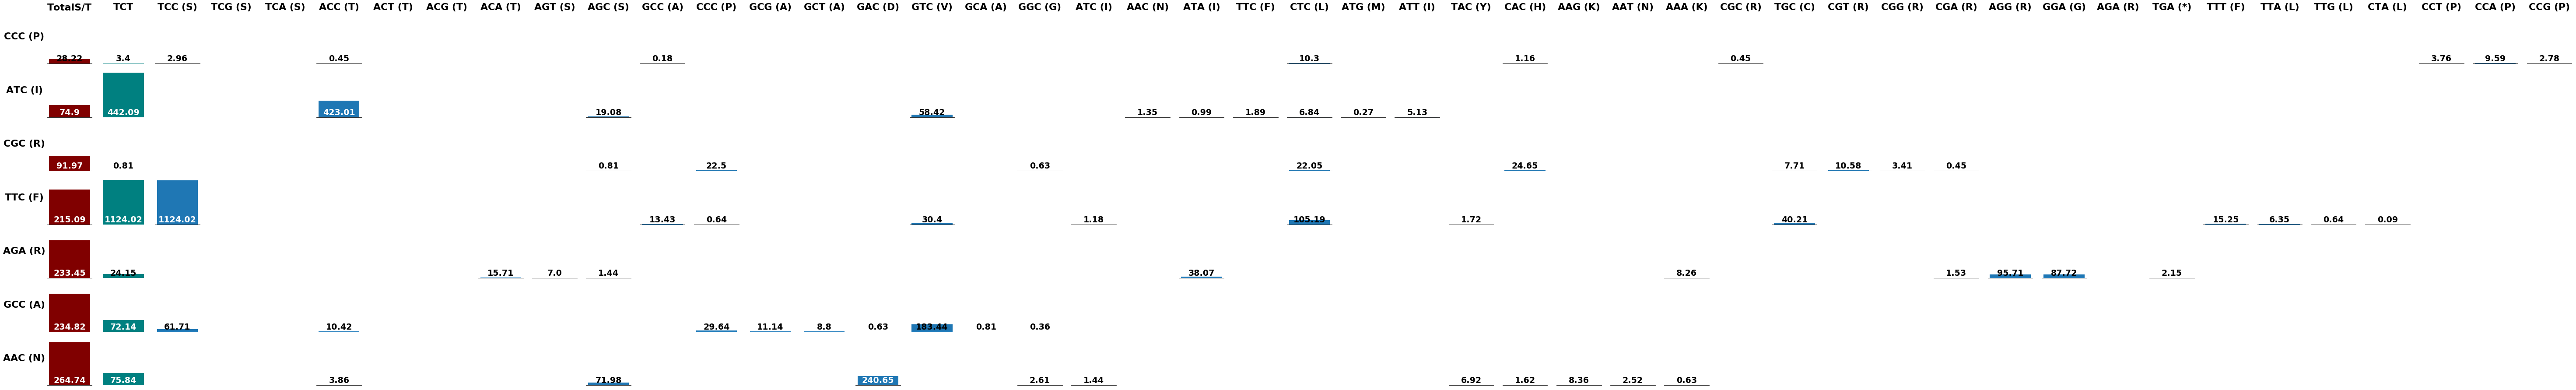

In [28]:
from operator import itemgetter
font=22
weight='semibold'


j=0
fig,ax_handles= plt.subplots(len(codons), len(labels),gridspec_kw = {'wspace':0.2,'hspace':0.2},figsize=(2.2*len(labels),2.2*len(codons)), sharex=True)

codonsums=[]
mutsums=[]
STsums=[]
codonsort=[]
for sourcecodon in codons:
    if sourcecodon:
        data=totalmutsum[sourcecodon]
        codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
        for i,aa in enumerate(labels):
            currentaminoacidtotal=0
            datasum=0

            if aa==labels[0]:
                datasum=0
                for codon in data.index:
                    if CommonMotifProb.translateRNA(codon) not in ['S','T']:
                        datasum+=data[codon]
                totalmut100k=(datasum*100000.0)/float(codonsum)
                codonsums.append(totalmut100k)
                codonsort.append((sourcecodon,totalmut100k))
            elif aa==labels[1]:
                datasum=0
                for codon in data.index:
                    if CommonMotifProb.translateRNA(codon) in ['S','T']:
                        datasum+=data[codon]
                totalmut100k=(datasum*100000.0)/float(codonsum)
                STsums.append(totalmut100k)
               
            elif aa!= sourcecodon:
                currentaminoacidtotal=data[aa]
                norm=(currentaminoacidtotal*100000.0)/float(codonsum)
                mutsums.append(norm)
            
maxcodonsum=max(codonsums)
maxmutsum=max(mutsums)
maxSTsum=maxcodonsum
print maxcodonsum,maxmutsum
codonssorted= [i[0] for i in sorted(codonsort, key=itemgetter(1),reverse=False) if i[1]>0]
print codonssorted
for sourcecodon in codonssorted:
    data=totalmutsum[sourcecodon]
    codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
    

    for i,aa in enumerate(labels):
        currentaminoacidtotal=0

        #print currentaminoacidtotal

    
        ax=ax_handles[j][i]
        
        
        
        if aa==labels[0]:
            datasum=0
            for codon in data.index:
                if CommonMotifProb.translateRNA(codon) not in ['S','T']:
                    datasum+=data[codon]
            totalmut100k=(datasum*100000.0)/float(codonsum)
            ax.bar([1],totalmut100k,align='center',color='maroon')
            ax.set_ylim(0,maxcodonsum+10)
            if totalmut100k>(0.2*maxcodonsum):
                color='white'
            else:
                color='black'
            if totalmut100k>0:
                ax.text(0.5, 0.01, round(totalmut100k,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)
        elif aa==labels[1]:
            datasum=0
            for codon in data.index:
                if CommonMotifProb.translateRNA(codon) in ['S','T']:
                    datasum+=data[codon]
            totalmut100k=(datasum*100000.0)/float(codonsum)
            ax.bar([1],totalmut100k,align='center',color='teal')
            ax.set_ylim(0,maxSTsum+10)
            if totalmut100k>(0.2*maxSTsum):
                color='white'
            else:
                color='black'
            if totalmut100k>0:
                ax.text(0.5, 0.01, round(totalmut100k,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)
        elif aa!=sourcecodon:
            currentaminoacidtotal=data[aa]
            norm=(currentaminoacidtotal*100000.0)/float(codonsum)
            if norm>(0.2*maxmutsum):
                color='white'
            else:
                color='black'
            if norm>0:
                ax.text(0.5, 0.01, round(norm,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)
            ax.bar([1],norm,align='center')
            ax.set_ylim(0,maxmutsum+10)
            
        if sourcecodon==codonssorted[0]:
            if aa!=labels[0] and aa!=labels[1]:
                
                ax.set_xlabel(aa+' ('+CommonMotifProb.translateRNA(aa)+')',labelpad=20,fontsize=font,fontweight=weight)
            else:
                ax.set_xlabel(aa,labelpad=20,fontsize=font,fontweight=weight)
            ax.xaxis.set_label_position('top')
            
        if aa==labels[0]:
            ax.set_ylabel(sourcecodon+' ('+CommonMotifProb.translateRNA(sourcecodon)+')',rotation=0,labelpad=30+font,ha='center',fontsize=font,fontweight=weight)
            ax.yaxis.set_label_position('left')
            

        
        if currentaminoacidtotal>0 or aa==labels[0]:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)

            ax.spines['bottom'].set_visible(True)
        else:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.tick_params(axis='y', color='white',labelcolor='white')

        ax.set_yticks([])
            
        ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_aspect('equal')
    j+=1

# For motif gain

In [55]:
totalsimresultsreplicatesDF

,StartCodon,PopReplicate,TargetCodon,Count
0,GCC,1,GCC,11162
1,GCC,1,GTC,1
2,GCC,1,TCC,1
3,GCC,1,CCC,1
4,GCC,1,GCT,1
5,GCC,2,GCC,11166
6,GCC,3,GCC,11165
7,GCC,3,GTC,1
8,GCC,4,GCC,11164
9,GCC,4,CCC,2


In [25]:
labels2=['TotalS/T','TCT','TCC','TCG','TCA','ACC','ACT','ACG','ACA','AGT','AGC','ATC','ATA','TTC','AGA','AAC','GCC','CCC','CGC']
labels=['TotalS/T']
codons=['ATC','ATA','TTC','AGA','AAC','GCC','CCC','CGC']


In [26]:
#DFlist=[pd.read_csv('STsim1000reps.csv',index_col=0),pd.read_csv('STsim500reps_1.csv',index_col=0),pd.read_csv('STsim500reps_2.csv',index_col=0),pd.read_csv('STsim500reps_3.csv',index_col=0),pd.read_csv('STsim500reps_4.csv',index_col=0)]
#DFlist=[pd.read_csv('CodontoSTgainfor8codons-forThesis_1.csv',index_col=0),pd.read_csv('CodontoSTgainfor8codons-forThesis_2.csv',index_col=0),pd.read_csv('CodontoSTgainfor8codons-forThesis_3.csv',index_col=0),pd.read_csv('CodontoSTgainfor8codons-forThesis_4.csv',index_col=0),pd.read_csv('CodontoSTgainfor8codons-forThesis_5.csv',index_col=0)]#,pd.read_csv('STsimAltRate500reps_6.csv',index_col=0)]
DFlist=[pd.read_csv('CodontoSTgainfor8codons-forThesis_'+str(i)+'.csv') for i in range(1,30)]
fullDFs=pd.concat(DFlist)
fullDF=fullDFs[fullDFs['TargetCodon'].isin(labels2)]
print fullDF
alltargetCodons=fullDF.TargetCodon.unique()
print alltargetCodons
totalmutsum=pd.DataFrame(index=CommonMotifProb.DNACodontoAADICT.keys(),columns=codons)
allcodonsum=pd.DataFrame(index=CommonMotifProb.DNACodontoAADICT.keys(),columns=['Count'])
totalmutsum=totalmutsum.fillna(0)
allcodonsum=allcodonsum.fillna(0)
#labels=['Non-S/T','Total S/T']


for codon in codons:
    summary={}
    tempDF=fullDF[fullDF['StartCodon']==codon]
    for TCodon in alltargetCodons:
        eachtargetDF=tempDF[tempDF['TargetCodon']==TCodon]
        if TCodon not in labels:
            labels.append(TCodon)
        if TCodon!=codon:
            nooutlierDF=eachtargetDF[eachtargetDF['Count']<6000]
            totalmutsum[codon][TCodon]=np.sum(nooutlierDF['Count'])
        else: 
            allcodonsum['Count'][TCodon]=np.sum(eachtargetDF['Count'])


       Unnamed: 0 StartCodon  PopReplicate TargetCodon  Count
0               0        GCC             1         GCC  11162
2               2        GCC             1         TCC      1
3               3        GCC             1         CCC      1
5               5        GCC             2         GCC  11166
6               6        GCC             3         GCC  11165
8               8        GCC             4         GCC  11164
9               9        GCC             4         CCC      2
10             10        GCC             5         GCC  11163
12             12        GCC             5         CCC      2
13             13        GCC             6         GCC  11165
15             15        GCC             7         ACC      1
16             16        GCC             7         GCC  11163
17             17        GCC             7         TCC      1
19             19        GCC             8         ACC      2
20             20        GCC             8         GCC  11161
22      

In [19]:
eachtargetDF

,Unnamed: 0,StartCodon,PopReplicate,TargetCodon,Count


In [22]:
a=fullDF[fullDF['TargetCodon'].isin(labels)]
totalcount={}
for i in codons:
    totalcount[i]={'TCT':0,'TCC':0,'TCA':0,'TCG':0,'ACT':0,'ACC':0,'ACA':0,'ACG':0,'AGT':0,'AGC':0}
for i,data in a.iterrows():
    #totalcount[data.StartCodon][data.TargetCodon]+=data.Count
    if data.Count < 15000:
        totalcount[data.StartCodon][data.TargetCodon]+=data.Count

    

In [23]:
totalcount

{'AAC': {'ACA': 0,
  'ACC': 16622,
  'ACG': 0,
  'ACT': 91,
  'AGC': 190581,
  'AGT': 13,
  'TCA': 0,
  'TCC': 0,
  'TCG': 0,
  'TCT': 0},
 'AGA': {'ACA': 54698,
  'ACC': 31,
  'ACG': 223,
  'ACT': 3,
  'AGC': 14860,
  'AGT': 23892,
  'TCA': 5,
  'TCC': 0,
  'TCG': 0,
  'TCT': 0},
 'ATA': {'ACA': 284771,
  'ACC': 8,
  'ACG': 478,
  'ACT': 11,
  'AGC': 0,
  'AGT': 2,
  'TCA': 11,
  'TCC': 0,
  'TCG': 0,
  'TCT': 0},
 'ATC': {'ACA': 3,
  'ACC': 262836,
  'ACG': 6,
  'ACT': 14,
  'AGC': 32351,
  'AGT': 0,
  'TCA': 0,
  'TCC': 7,
  'TCG': 0,
  'TCT': 0},
 'CCC': {'ACA': 0,
  'ACC': 6736,
  'ACG': 0,
  'ACT': 0,
  'AGC': 0,
  'AGT': 0,
  'TCA': 0,
  'TCC': 33707,
  'TCG': 0,
  'TCT': 3},
 'CGC': {'ACA': 0,
  'ACC': 1,
  'ACG': 0,
  'ACT': 0,
  'AGC': 12310,
  'AGT': 1,
  'TCA': 0,
  'TCC': 32,
  'TCG': 0,
  'TCT': 0},
 'GCC': {'ACA': 0,
  'ACC': 34201,
  'ACG': 0,
  'ACT': 2,
  'AGC': 0,
  'AGT': 0,
  'TCA': 1,
  'TCC': 49081,
  'TCG': 1,
  'TCT': 2},
 'TTC': {'ACA': 0,
  'ACC': 13,
  'ACG'

In [18]:
totalmutsum['ATA']
allcodonsum['Count']['ATA']

166357333

177.074827993 157.652301495
['ATC', 'ATA', 'TTC', 'AAC', 'AGA', 'GCC', 'CCC', 'CGC']


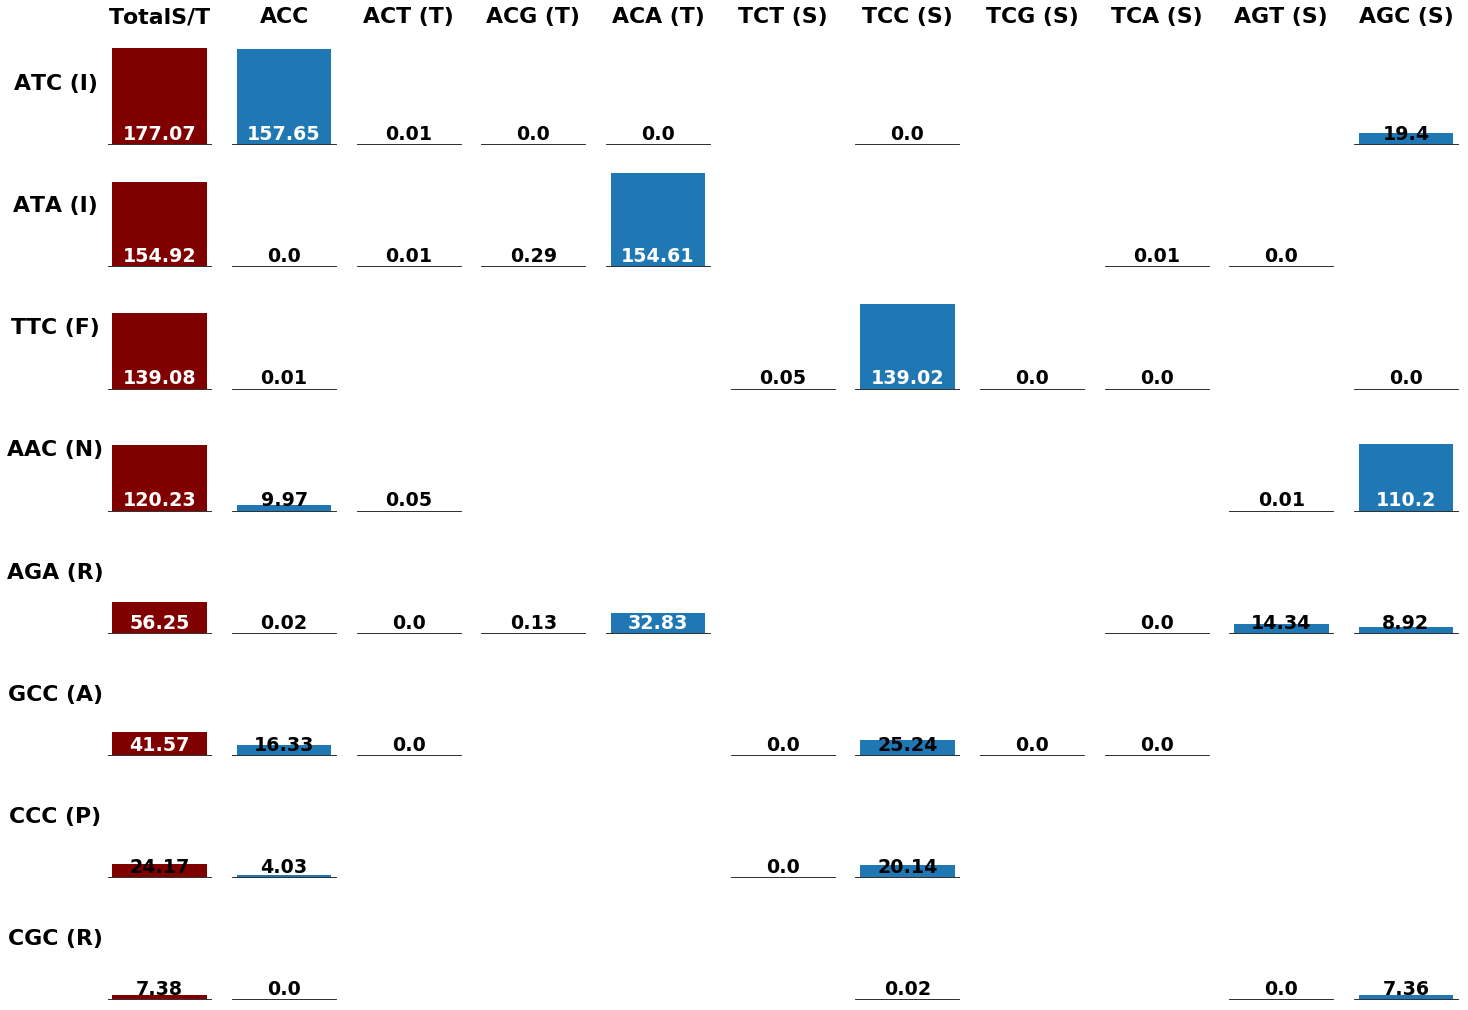

In [27]:
from operator import itemgetter
labels=['TotalS/T','ACC','ACT','ACG','ACA','TCT','TCC','TCG','TCA','AGT','AGC']
font=22
weight='semibold'


j=0
fig,ax_handles= plt.subplots(len(codons), len(labels),gridspec_kw = {'wspace':0.2,'hspace':0.2},figsize=(2.2*len(labels),2.2*len(codons)), sharex=True)

codonsums=[]
mutsums=[]
STsums=[]
codonsort=[]
for sourcecodon in codons:
    if sourcecodon:
        data=totalmutsum[sourcecodon]
        codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
        for i,aa in enumerate(labels):
            currentaminoacidtotal=0
            datasum=0

            if aa==labels[0]:
                datasum=0
                for codon in data.index:
                    if CommonMotifProb.translateRNA(codon) in ['S','T']:
                        datasum+=data[codon]
                totalmut100k=(datasum*100000.0)/float(codonsum)
                codonsums.append(totalmut100k)
                codonsort.append((sourcecodon,totalmut100k))

               
            elif aa!= sourcecodon:
                currentaminoacidtotal=data[aa]
                norm=(currentaminoacidtotal*100000.0)/float(codonsum)
                mutsums.append(norm)
            
maxcodonsum=max(codonsums)
maxmutsum=max(mutsums)
maxSTsum=maxcodonsum
print maxcodonsum,maxmutsum
codonssorted= [i[0] for i in sorted(codonsort, key=itemgetter(1),reverse=True) if i[1]>0]
print codonssorted
for sourcecodon in codonssorted:
    data=totalmutsum[sourcecodon]
    codonsum=allcodonsum['Count'][sourcecodon]#totalcodoncount per codon
    

    for i,aa in enumerate(labels):
        currentaminoacidtotal=0

        #print currentaminoacidtotal

    
        ax=ax_handles[j][i]
        
        
        
        if aa==labels[0]:
            datasum=0
            for codon in data.index:
                if CommonMotifProb.translateRNA(codon) in ['S','T']:
                    datasum+=data[codon]
            totalmut100k=(datasum*100000.0)/float(codonsum)
            ax.bar([1],totalmut100k,align='center',color='maroon')
            ax.set_ylim(0,maxcodonsum+10)
            if totalmut100k>(0.2*maxcodonsum):
                color='white'
            else:
                color='black'
            if totalmut100k>0:
                ax.text(0.5, 0.01, round(totalmut100k,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)

        elif aa!=sourcecodon:
            currentaminoacidtotal=data[aa]
            norm=(currentaminoacidtotal*100000.0)/float(codonsum)
            if norm>(0.2*maxmutsum):
                color='white'
            else:
                color='black'
            if norm>0:
                ax.text(0.5, 0.01, round(norm,2),
                verticalalignment='bottom', horizontalalignment='center',
                transform=ax.transAxes,
                color=color, fontsize=font-3,fontweight=weight)
            ax.bar([1],norm,align='center')
            ax.set_ylim(0,maxmutsum+10)
            
        if sourcecodon==codonssorted[0]:
            if aa!=labels[0] and aa!=labels[1]:
                
                ax.set_xlabel(aa+' ('+CommonMotifProb.translateRNA(aa)+')',labelpad=20,fontsize=font,fontweight=weight)
            else:
                ax.set_xlabel(aa,labelpad=20,fontsize=font,fontweight=weight)
            ax.xaxis.set_label_position('top')
            
        if aa==labels[0]:
            ax.set_ylabel(sourcecodon+' ('+CommonMotifProb.translateRNA(sourcecodon)+')',rotation=0,labelpad=30+font,ha='center',fontsize=font,fontweight=weight)
            ax.yaxis.set_label_position('left')
            

        
        if currentaminoacidtotal>0 or aa==labels[0]:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)

            ax.spines['bottom'].set_visible(True)
        else:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_color('white')
            ax.spines['bottom'].set_color('white')
            ax.tick_params(axis='y', color='white',labelcolor='white')

        ax.set_yticks([])
            
        ax.set_xticks([])
        #ax.set_yticks([])
        #ax.set_aspect('equal')
    j+=1

In [28]:
fig.savefig("SimSTGainmutQuasi_Thesis.pdf",format='pdf')

In [ ]:
#AGGAGGGGTATCAACGGTGCA #high gain

#AGGAGGGGTCGCAACGGTGCA #low gain

In [ ]:
datalist=[]
for i in range(1000):
    datalist.append(sum(onlytrue[onlytrue['Sim']==i]['SeqCount']))
    print '###',i, sum(onlytrue[onlytrue['Sim']==i]['SeqCount'])

In [ ]:
datalist2=[]
b=pd.read_csv('QuasiSimMotifGainLow1mut.csv',index_col=0)
onlytrue2=b[b['isMotif']==True]
for i in range(1000):
    datalist2.append(sum(onlytrue2[onlytrue2['Sim']==i]['SeqCount']))
    print '###',i, sum(onlytrue2[onlytrue2['Sim']==i]['SeqCount'])

In [ ]:
figs={'HighGain':datalist,'LowGain':datalist2}
figs=pd.DataFrame(figs)
figs

In [ ]:
print len(figs[figs['LowGain']>0])

In [ ]:
fig, (ax2) = plt.subplots(ncols=1)
#plt.ylim(0, 100)
sns.boxplot(data=figs,showfliers=False)

In [ ]:
print dataframe1
dataframe1.to_csv('QuasiSimMotifGinHigh1mut.csv')

In [ ]:
motifgain=[]
for i in collecteddata:
    motifgain.append(collecteddata[i]['Motif'])
print motifgain

In [ ]:
df = pd.DataFrame(columns=CommonMotifProb.Codons+CommonMotifProb.stopCodons)


In [ ]:
df.to_csv('FirstcodonsimsTCCTCTTCA.csv')